# No 2

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats
from scipy.stats import t


data_path = 'weather.csv'
data = pd.read_csv(data_path)

def deteksi_outlier_iqr_manual(data):
    outlier_indices = {}
    for kolom in data.select_dtypes(include=['number']).columns:
        Q1 = data[kolom].quantile(0.25)
        Q3 = data[kolom].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        outlier_mask = (data[kolom] < batas_bawah) | (data[kolom] > batas_atas)
        outlier_indices[kolom] = data[kolom][outlier_mask].index.tolist()
    return outlier_indices

def imputasi_outlier(data, outlier_indices):
    for kolom, indices in outlier_indices.items():
        median = data[kolom].median()
        data.loc[indices, kolom] = median
    return data

outlier_indices_manual = deteksi_outlier_iqr_manual(data)

data_imputasi = imputasi_outlier(data.copy(), outlier_indices_manual)


#Belah dua data
length = data_imputasi.shape[0]
areaA = data_imputasi[:1000]
areaB = data_imputasi[1000:]
print(length)


2000


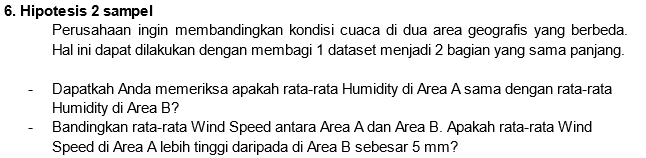

In [23]:
# Hitung mean dan deviasi untuk A
mean_areaA = sum(areaA['Humidity']/1000)

varians_areaA = 0
for humidity in areaA['Humidity']:
    varians_areaA += math.pow((humidity - mean_areaA), 2)
varians_areaA /= 1000 - 1
standardeviasiA = math.sqrt(varians_areaA)

# Hitung mean dan deviasi untuk B
mean_areaB = sum(areaB['Humidity']/1000)

varians_areaB = 0
for humidity in areaB['Humidity']:
    varians_areaB += math.pow((humidity - mean_areaB), 2)
varians_areaB /= 1000 - 1
standardeviasiB = math.sqrt(varians_areaB)

# Hypothesis
# H0: u1 - u2 = 0
# H1: u1 - u2 != 0

# Significance level
alpha = 0.05

# Membuktikan u1 - u2 = d0 dengan standar deviasi uniform yang tidak diketahui
# Gunakan distribusi-t

# Diketahui
s1 = standardeviasiA
s2 = standardeviasiB
n1 = 1000
n2 = 1000
u1 = mean_areaA
u2 = mean_areaB
d0 = 0 #u1 = u2

# Hitung sp
sp2 = ((n1 - 1) * math.pow(s1, 2) + (n2 - 1) * math.pow(s2, 2)) / (n1 + n2 - 2)
sp = math.sqrt(sp2)

# Hitung t
t_value = ((u1 - u2) - d0) / (sp * math.sqrt(1/n1 + 1/n2))

# Hitung degree of freedom
v = n1 + n2 - 2

# Hitung two tailed p value
p_value = 2 * (1 - stats.t.cdf(abs(t_value), df=v))

# Hitung daerah kritis
critical_value_low = stats.t.ppf(alpha/2, df=v) #0.025
critical_value_high = stats.t.ppf(1 - alpha/2, df=v) #0.975

# Print results
print(f"t-value: {t_value}")
print(f"p-value: {p_value}")
print(f"Critical value (low): {critical_value_low}")
print(f"Critical value (high): {critical_value_high}")

# Compare t-value with critical values to make a decision
if t_value < critical_value_low or t_value > critical_value_high:
    print(f"\n{p_value} < {alpha}")
    print("Tolak H0")
    print("Rata-rata humidity area A berbeda dengan rata-rata humidity area B")
else:
    print(f"\n{p_value} > {alpha}")
    print("Gagal menolak H0")
    print("Rata-rata humidity area A sama dengan rata-rata humidity area B")



t-value: -0.12659222179898152
p-value: 0.899275891151988
Critical value (low): -1.961152014836706
Critical value (high): 1.9611520148367056

0.899275891151988 > 0.05
Gagal menolak H0
Rata-rata humidity area A sama dengan rata-rata humidity area B
